In [127]:
import pandas as pd
import seaborn as sns

In [128]:
Chemie = pd.read_excel(r'C:\Users\neena\Documents\Masters Courses\CaseStudy\Data Modified\ChemieModified1.xlsx')
HGII = pd.read_excel(r'C:\Users\neena\Documents\Masters Courses\CaseStudy\Data Modified\HGIIModified1.xlsx')
OH14 = pd.read_excel(r'C:\Users\neena\Documents\Masters Courses\CaseStudy\Data Modified\OH14Modified1.xlsx')
KH = pd.read_excel(r'C:\Users\neena\Documents\Masters Courses\CaseStudy\Data Modified\Kita HokidoModified1.xlsx')
GTP = pd.read_excel(r'C:\Users\neena\Documents\Masters Courses\CaseStudy\Data Modified\GroßtagespflegeModified1.xlsx')
OH12 = pd.read_excel(r'C:\Users\neena\Documents\Masters Courses\CaseStudy\Data Modified\OH12Modified1.xlsx')

In [129]:
Chemie.head(10)

,Date,Wärmeenergie Tarif 1,Durchfluss,Vorlauftemperatur,Rücklauftemperatur,Wärmeleistung,Volumen Kanal 1,Volumen Kanal 1.1,WV+ Arbeit Tarif 1,WV+ Arbeit Tarif 1.1,WV+ Arbeit Tarif 1.2,WV- Arbeit Tarif 1,Volumen Kanal 1.2
0,2020-03-14 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490274.3,9675.7,NaN,NaN,NaN
1,2020-03-14 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490361.1,9675.7,NaN,NaN,NaN
2,2020-03-14 15:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490449.5,9675.7,NaN,NaN,NaN
3,2020-03-14 16:00:00,44520655.0,4.903,97.0,74.3,126.965,NaN,NaN,1490538.8,9675.8,NaN,NaN,NaN
4,2020-03-14 16:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490623.7,9675.8,NaN,NaN,NaN
5,2020-03-14 16:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490711.6,9675.8,NaN,NaN,NaN
6,2020-03-14 16:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490797.9,9675.8,NaN,NaN,NaN
7,2020-03-14 17:00:00,44520780.0,3.646,108.4,78.3,124.831,NaN,NaN,1490887.3,9675.8,NaN,NaN,NaN
8,2020-03-14 17:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1490972.8,9675.9,NaN,NaN,NaN
9,2020-03-14 17:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1491061.2,9675.9,NaN,NaN,NaN


In [130]:
df_Chemie = Chemie.groupby(by=Chemie['Date'].dt.date).agg({'Wärmeenergie Tarif 1':'max',                      
                       'Durchfluss': 'sum',
                        'Vorlauftemperatur':'mean','Rücklauftemperatur':'mean',
                    'Wärmeleistung':'sum','Volumen Kanal 1.1':'max','Volumen Kanal 1.2':'max',
                    'Volumen Kanal 1':'max','WV+ Arbeit Tarif 1':'max', 'WV+ Arbeit Tarif 1.1':'max',
                    'WV+ Arbeit Tarif 1.2':'max', 'WV- Arbeit Tarif 1':'max'})
df_Chemie = df_Chemie.reset_index(level=0)


In [131]:
df_Chemie['Date'] = pd.to_datetime(df_Chemie['Date'])

In [132]:
df_Chemie['Year'] = df_Chemie['Date'].dt.year
df_Chemie['Month'] = df_Chemie['Date'].dt.month

In [133]:
df_Chemie['Wärmeenergie Tarif 1_Diff'] = df_Chemie['Wärmeenergie Tarif 1'].diff()
df_Chemie['Volumen Kanal 1_Diff'] = df_Chemie['Volumen Kanal 1'].diff()
df_Chemie['Volumen Kanal 1.1_Diff'] = df_Chemie['Volumen Kanal 1.1'].diff()
df_Chemie['Volumen Kanal 1.2_Diff'] = df_Chemie['Volumen Kanal 1.2'].diff()
df_Chemie['WV+ Arbeit Tarif 1_Diff'] = df_Chemie['WV+ Arbeit Tarif 1'].diff()
df_Chemie['WV+ Arbeit Tarif 1.1_Diff'] = df_Chemie['WV+ Arbeit Tarif 1.1'].diff()
df_Chemie['WV+ Arbeit Tarif 1.2_Diff'] = df_Chemie['WV+ Arbeit Tarif 1.2'].diff()
df_Chemie['WV- Arbeit Tarif 1_Diff'] = df_Chemie['WV- Arbeit Tarif 1'].diff()

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1_Diff'>

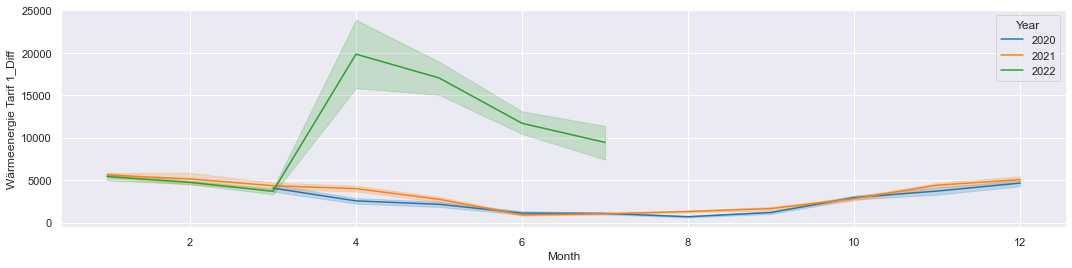

In [134]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="Wärmeenergie Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1.1_Diff'>

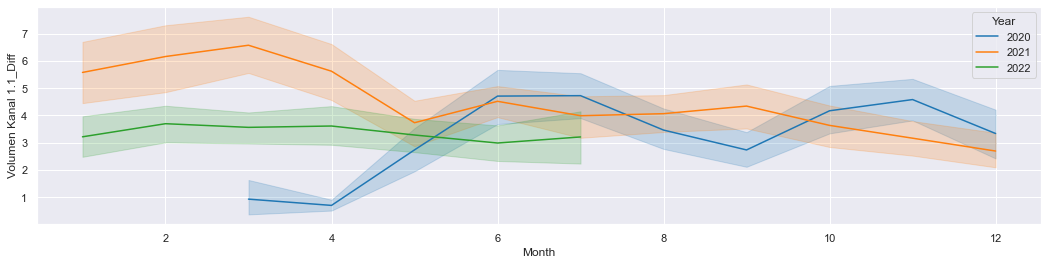

In [135]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="Volumen Kanal 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1_Diff'>

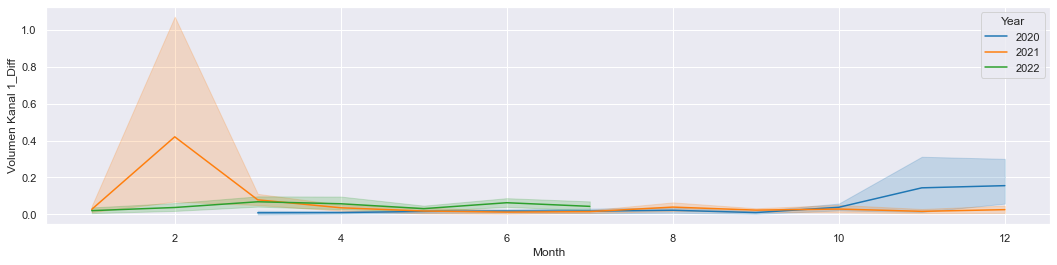

In [136]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="Volumen Kanal 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1.2_Diff'>

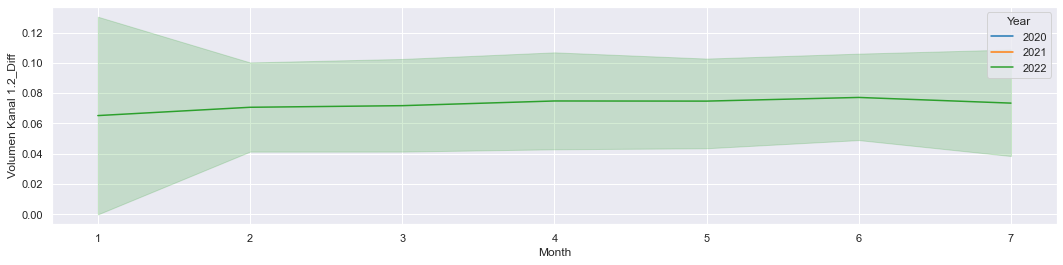

In [137]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="Volumen Kanal 1.2_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1_Diff'>

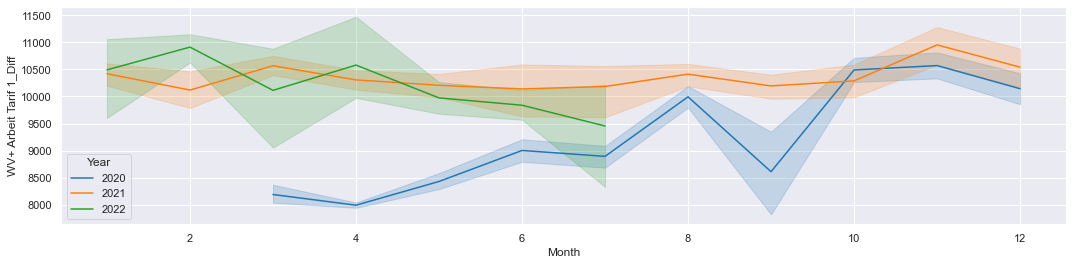

In [138]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="WV+ Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.1_Diff'>

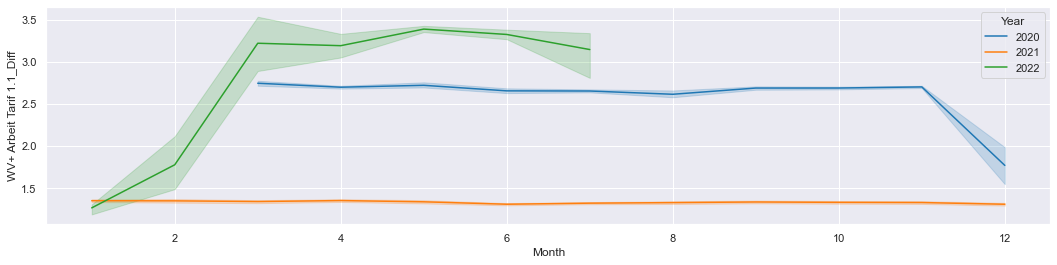

In [139]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="WV+ Arbeit Tarif 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.2_Diff'>

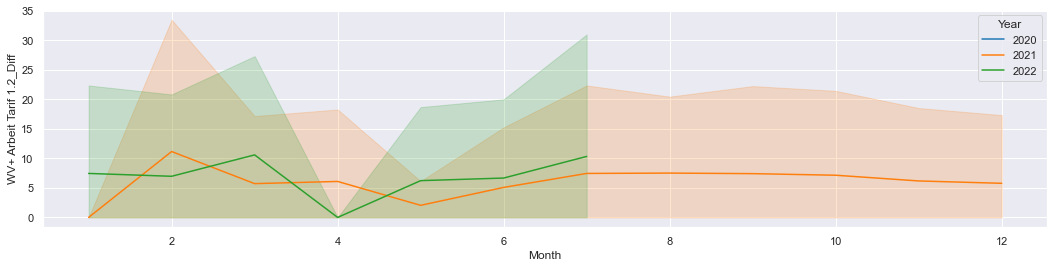

In [140]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="WV+ Arbeit Tarif 1.2_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV- Arbeit Tarif 1_Diff'>

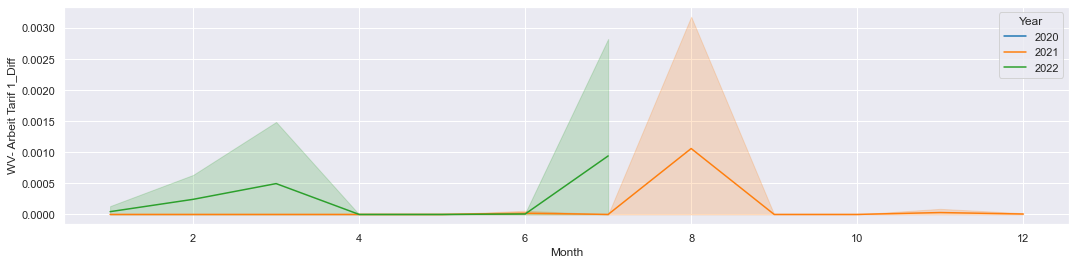

In [141]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_Chemie, x="Month", y="WV- Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

In [142]:
HGII.head(10)

,Date,Wärmeenergie Tarif 1,Durchfluss,Volumen,Vorlauftemperatur,Rücklauftemperatur,Temperaturdifferenz,Wärmeleistung,Wärmeenergie Tarif 1.1,Durchfluss.1,...,Rücklauftemperatur.1,Temperaturdifferenz.1,Wärmeleistung.1,Volumen Kanal 1,Volumen Kanal 1.1,P Summe,WV+ Arbeit Tarif 1,WV+ Arbeit Tarif 1.1,WV+ Arbeit Tarif 1.2,WV+ Arbeit Tarif 1.3
0,2021-09-22 12:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.2,0.0,0.0,7453.399,128.892,44.079562,133224.2002,970121.75,517197.28,32059.20
1,2021-09-22 13:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.2,0.0,0.0,7453.407,128.892,44.203617,133235.2658,970123.35,517199.95,32059.37
2,2021-09-22 13:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.2,0.0,0.0,7453.415,128.892,43.996729,133246.2912,970124.95,517202.54,32059.55
3,2021-09-22 13:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.2,0.0,0.0,7453.472,128.892,44.156330,133257.3015,970126.56,517205.31,32059.77
4,2021-09-22 13:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.1,0.0,0.0,7453.487,128.892,44.242201,133268.3623,970128.19,517208.38,32060.10
5,2021-09-22 14:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.1,0.0,0.0,7453.498,128.892,44.481761,133279.4380,970129.82,517211.42,32060.42
6,2021-09-22 14:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.1,0.0,0.0,7453.499,128.892,44.075534,133290.4791,970131.51,517214.46,32060.74
7,2021-09-22 14:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.2,0.0,0.0,7453.502,128.892,44.039848,133301.5338,970133.12,517217.53,32061.06
8,2021-09-22 14:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.1,0.1,0.0,7453.521,128.892,44.542613,133312.5860,970134.74,517220.56,32061.37
9,2021-09-22 15:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4581450.0,0.0,...,24.1,0.0,0.0,7453.537,128.892,44.208648,133323.6473,970136.36,517223.61,32061.54


In [143]:
df_HGII = HGII.groupby(by=HGII['Date'].dt.date).agg({'Wärmeenergie Tarif 1':'max', 'Wärmeenergie Tarif 1.1':'max',                      
                    'Durchfluss': 'sum', 'Durchfluss.1': 'sum', 'Volumen' : 'max',
                    'Volumen.1' : 'max','Temperaturdifferenz':'mean', 'Temperaturdifferenz.1':'mean',
                    'Vorlauftemperatur':'mean','Vorlauftemperatur.1':'mean','Rücklauftemperatur':'mean',
                    'Rücklauftemperatur.1':'mean','Wärmeleistung':'sum','Volumen Kanal 1':'max',
                    'Wärmeleistung.1':'sum', 'P Summe':'mean', 'Volumen Kanal 1.1':'max',
                    'WV+ Arbeit Tarif 1':'max', 'WV+ Arbeit Tarif 1.1':'max',
                    'WV+ Arbeit Tarif 1.2':'max','WV+ Arbeit Tarif 1.3':'max'})
df_HGII = df_HGII.reset_index(level=0)

In [144]:
df_HGII['Date'] = pd.to_datetime(df_HGII['Date'])
df_HGII['Year'] = df_HGII['Date'].dt.year
df_HGII['Month'] = df_HGII['Date'].dt.month


In [145]:
df_HGII['Wärmeenergie Tarif 1_Diff'] = df_HGII['Wärmeenergie Tarif 1'].diff()
df_HGII['Wärmeenergie Tarif 1.1_Diff'] = df_HGII['Wärmeenergie Tarif 1.1'].diff()
df_HGII['Volumen_Diff'] = df_HGII['Volumen'].diff()
df_HGII['Volumen.1_Diff'] = df_HGII['Volumen.1'].diff()
df_HGII['Volumen Kanal 1_Diff'] = df_HGII['Volumen Kanal 1'].diff()
df_HGII['Volumen Kanal 1.1_Diff'] = df_HGII['Volumen Kanal 1.1'].diff()
df_HGII['WV+ Arbeit Tarif 1_Diff'] = df_HGII['WV+ Arbeit Tarif 1'].diff()
df_HGII['WV+ Arbeit Tarif 1.1_Diff'] = df_HGII['WV+ Arbeit Tarif 1.1'].diff()
df_HGII['WV+ Arbeit Tarif 1.2_Diff'] = df_HGII['WV+ Arbeit Tarif 1.2'].diff()
df_HGII['WV+ Arbeit Tarif 1.3_Diff'] = df_HGII['WV+ Arbeit Tarif 1.3'].diff()

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1_Diff'>

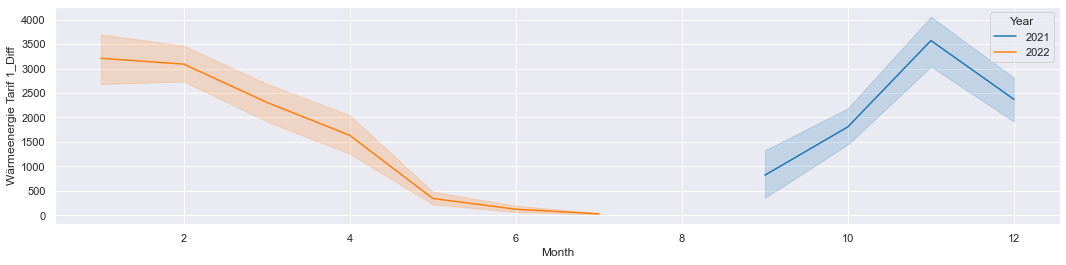

In [146]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="Wärmeenergie Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1.1_Diff'>

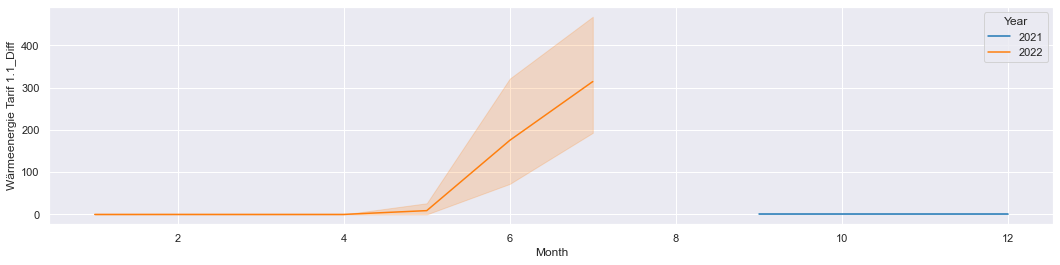

In [147]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="Wärmeenergie Tarif 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen_Diff'>

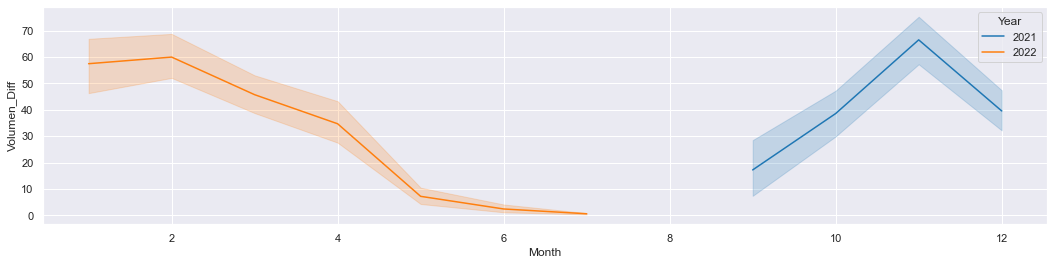

In [148]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="Volumen_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen.1_Diff'>

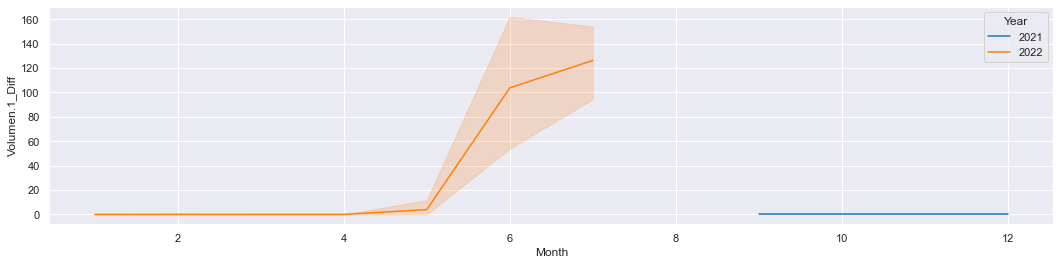

In [149]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="Volumen.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1_Diff'>

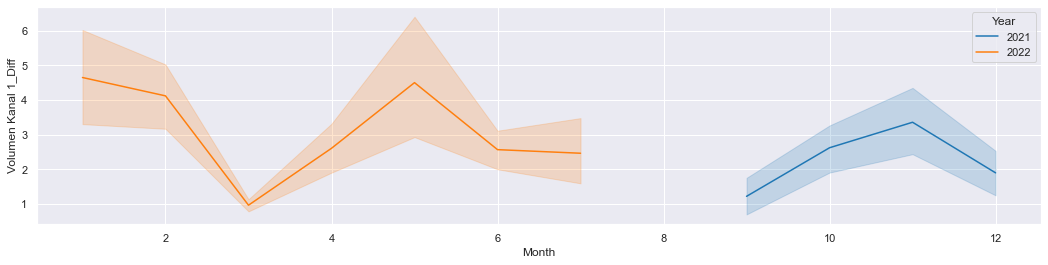

In [150]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="Volumen Kanal 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1.1_Diff'>

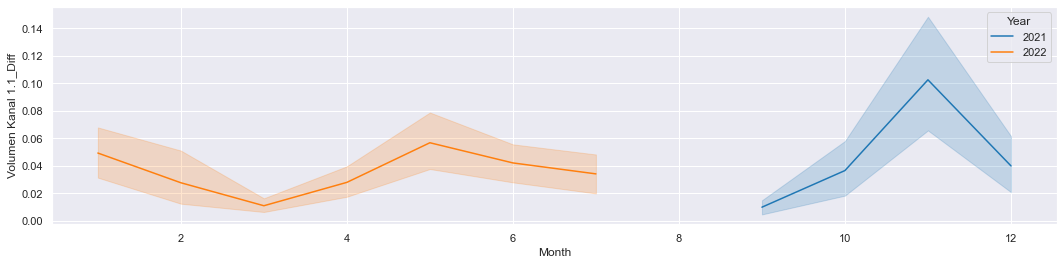

In [151]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="Volumen Kanal 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1_Diff'>

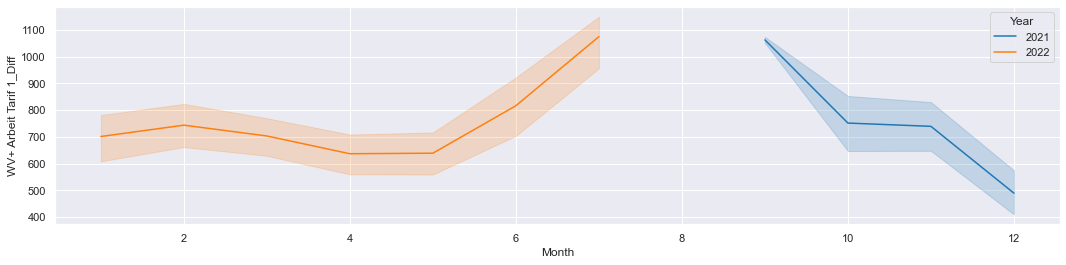

In [152]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="WV+ Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.1_Diff'>

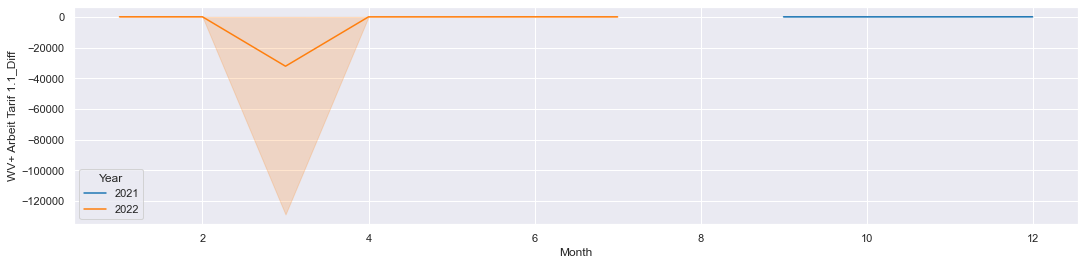

In [153]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="WV+ Arbeit Tarif 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.2_Diff'>

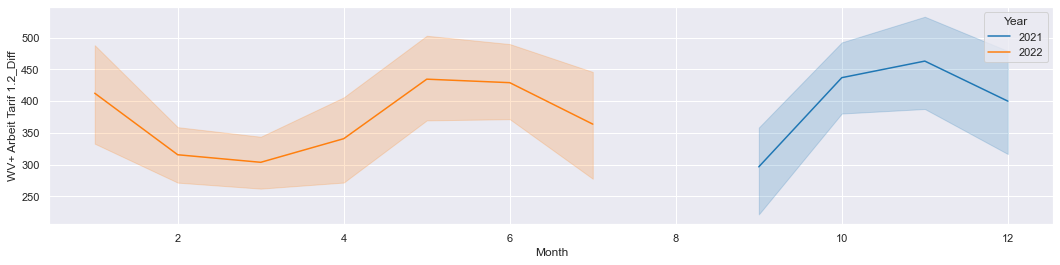

In [154]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="WV+ Arbeit Tarif 1.2_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.3_Diff'>

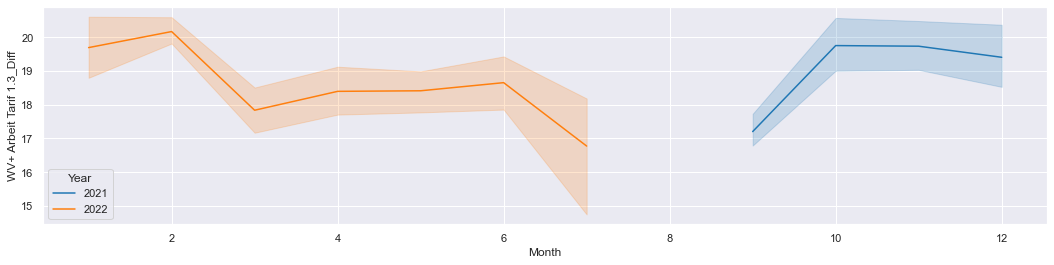

In [155]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_HGII, x="Month", y="WV+ Arbeit Tarif 1.3_Diff",hue="Year",palette="tab10")

In [156]:
OH14.head(5)

,Date,Wärmeenergie Tarif 1,Durchfluss,Volumen,Vorlauftemperatur,Rücklauftemperatur,Temperaturdifferenz,Wärmeleistung,Wärmeenergie Tarif 1.1,Durchfluss.1,Volumen.1,Vorlauftemperatur.1,Rücklauftemperatur.1,Temperaturdifferenz.1,Wärmeleistung.1,Volumen Kanal 1,WV+ Arbeit Tarif 1
0,2021-07-06 11:45:00,2066251.0,0.155,56611.56,75.0,63.4,11.68,2.061,4324851.0,7.320,716809.024,11.6,8.0,3.60,30.630,NaN,3945894.0
1,2021-07-06 12:00:00,2066251.0,0.126,56611.59,74.2,61.4,12.79,1.839,4324857.0,5.108,716810.513,12.1,7.9,4.27,25.365,NaN,3945904.0
2,2021-07-06 12:15:00,2066251.0,0.134,56611.62,73.4,61.1,12.20,1.868,4324864.0,5.765,716811.768,12.7,8.1,4.65,31.146,NaN,3945913.0
3,2021-07-06 12:30:00,2066252.0,0.130,56611.66,72.6,60.8,11.83,1.760,4324873.0,8.940,716813.689,12.3,8.5,3.89,40.441,NaN,3945923.0
4,2021-07-06 12:45:00,2066252.0,0.128,56611.69,72.0,60.2,11.80,1.725,4324883.0,8.881,716815.922,11.9,8.6,3.40,35.091,NaN,3945933.0


In [157]:
df_OH14 = OH14.groupby(by=OH14['Date'].dt.date).agg({'Wärmeenergie Tarif 1':'max', 'Wärmeenergie Tarif 1.1':'max',                      
                    'Durchfluss': 'sum', 'Durchfluss.1': 'sum', 'Volumen' : 'max',
                    'Volumen.1' : 'max','Temperaturdifferenz':'mean', 'Temperaturdifferenz.1':'mean',
                    'Vorlauftemperatur':'mean','Vorlauftemperatur.1':'mean','Rücklauftemperatur':'mean',
                    'Rücklauftemperatur.1':'mean','Wärmeleistung':'sum','Wärmeleistung.1':'sum',
                     'Volumen Kanal 1':'max',
                    'WV+ Arbeit Tarif 1':'max'})
df_OH14 = df_OH14.reset_index(level=0)

In [158]:
df_OH14['Date'] = pd.to_datetime(df_OH14['Date'])
df_OH14['Year'] = df_OH14['Date'].dt.year
df_OH14['Month'] = df_OH14['Date'].dt.month

In [159]:
df_OH14['Wärmeenergie Tarif 1_Diff'] = df_OH14['Wärmeenergie Tarif 1'].diff()
df_OH14['Wärmeenergie Tarif 1.1_Diff'] = df_OH14['Wärmeenergie Tarif 1.1'].diff()
df_OH14['Volumen_Diff'] = df_OH14['Volumen'].diff()
df_OH14['Volumen.1_Diff'] = df_OH14['Volumen.1'].diff()
df_OH14['Volumen Kanal 1_Diff'] = df_OH14['Volumen Kanal 1'].diff()

df_OH14['WV+ Arbeit Tarif 1_Diff'] = df_OH14['WV+ Arbeit Tarif 1'].diff()


<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1_Diff'>

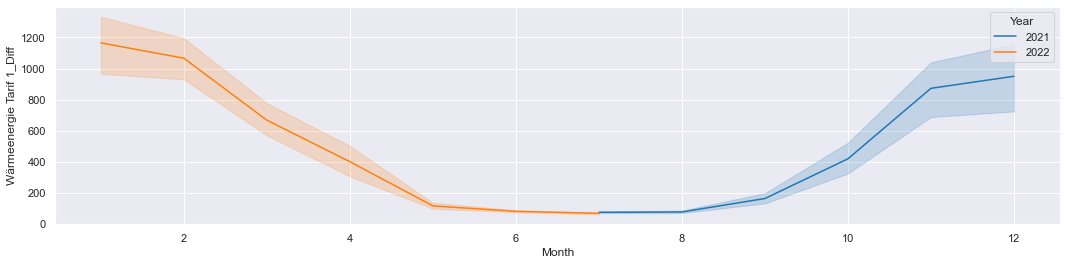

In [160]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH14, x="Month", y="Wärmeenergie Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1.1_Diff'>

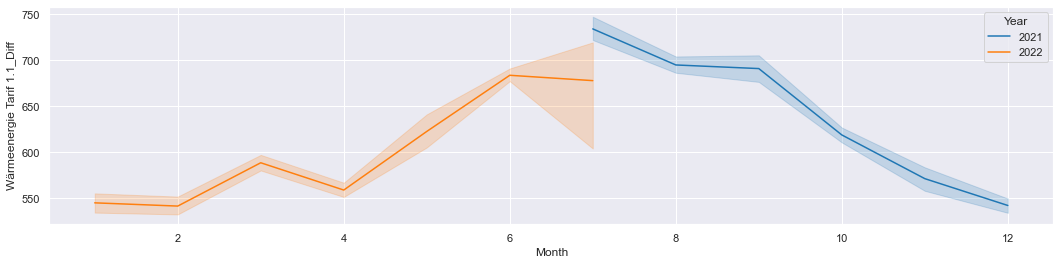

In [161]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH14, x="Month", y="Wärmeenergie Tarif 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen_Diff'>

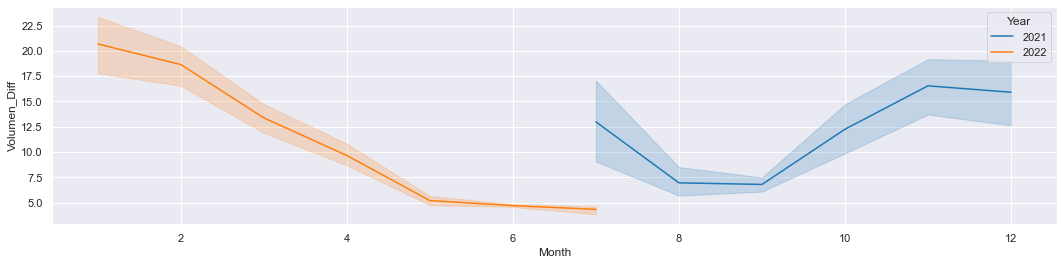

In [162]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH14, x="Month", y="Volumen_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen.1_Diff'>

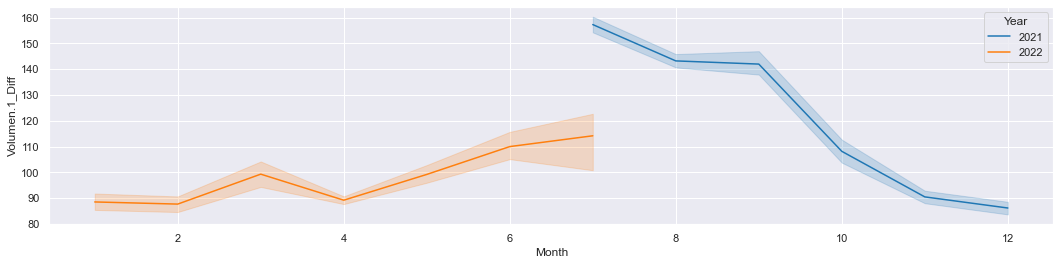

In [163]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH14, x="Month", y="Volumen.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1_Diff'>

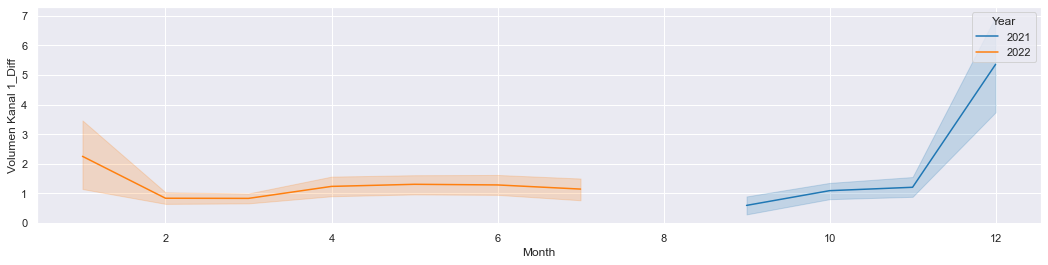

In [164]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH14, x="Month", y="Volumen Kanal 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1_Diff'>

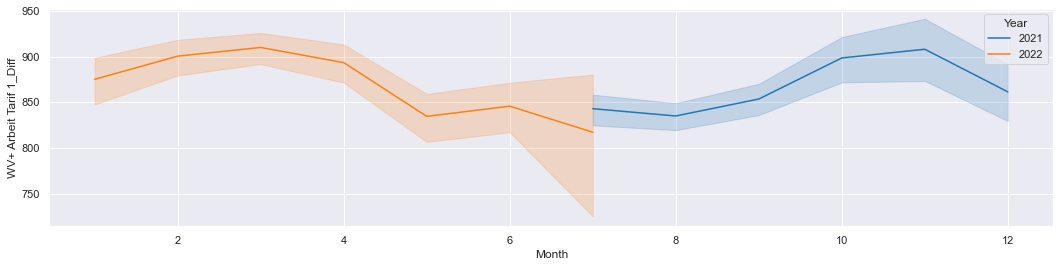

In [165]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH14, x="Month", y="WV+ Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

In [166]:
KH.head(5)

,Date,Wärmeenergie Tarif 1,Durchfluss,Vorlauftemperatur,Rücklauftemperatur,Wärmeleistung,Volumen Kanal 1,WV+ Arbeit Tarif 1
0,2020-03-14 15:15:00,NaN,NaN,NaN,NaN,NaN,NaN,88836.98
1,2020-03-14 15:30:00,NaN,NaN,NaN,NaN,NaN,NaN,88837.06
2,2020-03-14 15:45:00,NaN,NaN,NaN,NaN,NaN,NaN,88837.15
3,2020-03-14 16:00:00,376796.0,0.026,65.1,53.9,0.336,4284.65,88837.25
4,2020-03-14 16:15:00,NaN,NaN,NaN,NaN,NaN,NaN,88837.34


In [167]:
df_KH = KH.groupby(by=KH['Date'].dt.date).agg({'Wärmeenergie Tarif 1':'max',                      
                       'Durchfluss': 'sum',
                        'Vorlauftemperatur':'mean','Rücklauftemperatur':'mean',
                    'Wärmeleistung':'sum',
                    'Volumen Kanal 1':'max','WV+ Arbeit Tarif 1':'max'})
df_KH = df_KH.reset_index(level=0)


In [168]:
df_KH['Date'] = pd.to_datetime(df_KH['Date'])
df_KH['Year'] = df_KH['Date'].dt.year
df_KH['Month'] = df_KH['Date'].dt.month

In [169]:
df_KH['Wärmeenergie Tarif 1_Diff'] = df_KH['Wärmeenergie Tarif 1'].diff()


df_KH['Volumen Kanal 1_Diff'] = df_KH['Volumen Kanal 1'].diff()

df_KH['WV+ Arbeit Tarif 1_Diff'] = df_KH['WV+ Arbeit Tarif 1'].diff()


<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1_Diff'>

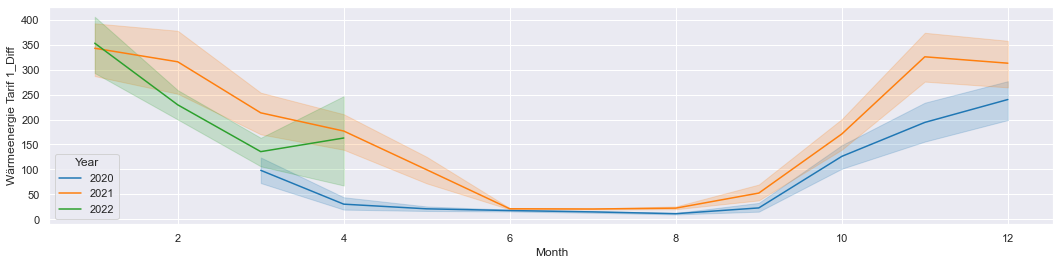

In [170]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_KH, x="Month", y="Wärmeenergie Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1_Diff'>

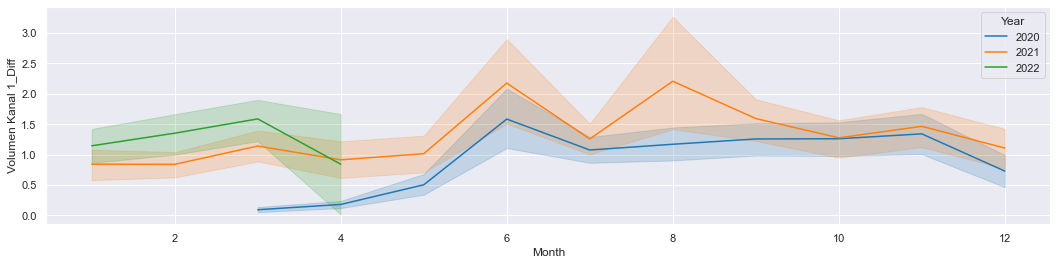

In [171]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_KH, x="Month", y="Volumen Kanal 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1_Diff'>

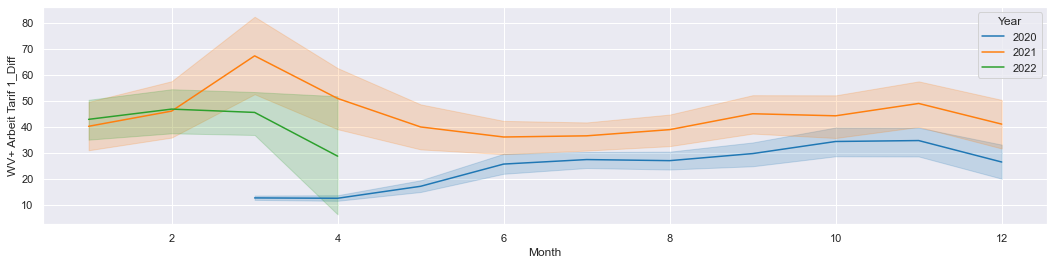

In [172]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_KH, x="Month", y="WV+ Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

In [173]:
GTP.head(5)

,Date,Wärmeenergie Tarif 1,Durchfluss,Volumen,Vorlauftemperatur,Rücklauftemperatur,Temperaturdifferenz,Wärmeleistung,Wärmeenergie Tarif 1.1,Durchfluss.1,...,WV- Arbeit tariflos,WV- Arbeit Tarif 1,WV+ Arbeit tariflos,WV+ Arbeit Tarif 1,WV+ Arbeit tariflos.1,WV+ Arbeit Tarif 1.1,WV+ Arbeit tariflos.2,WV+ Arbeit Tarif 1.2,WV- Arbeit tariflos.1,WV- Arbeit Tarif 1.1
0,2021-10-24 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1952.4022,1952.4022,67.697,67.697,116.1866,116.1866,21.3239,21.3239,2121.747,2121.747
1,2021-10-24 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-10-24 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-10-24 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-10-24 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [174]:
GTP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25701 entries, 0 to 25700
Data columns (total 29 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     25701 non-null  datetime64[ns]
 1    Wärmeenergie Tarif 1    25508 non-null  float64       
 2    Durchfluss              25508 non-null  float64       
 3    Volumen                 25508 non-null  float64       
 4    Vorlauftemperatur       25508 non-null  float64       
 5    Rücklauftemperatur      25508 non-null  float64       
 6    Temperaturdifferenz     25508 non-null  float64       
 7    Wärmeleistung           25508 non-null  float64       
 8    Wärmeenergie Tarif 1.1  25487 non-null  float64       
 9    Durchfluss.1            25487 non-null  float64       
 10   Volumen.1               25487 non-null  float64       
 11   Vorlauftemperatur.1     25487 non-null  float64       
 12   Rücklauftemperatur.1    25487 n

In [175]:
GTP = GTP.rename(columns=lambda x: x.strip())

In [176]:
df_GTP = GTP.groupby(by=GTP['Date'].dt.date).agg({'Wärmeenergie Tarif 1':'max', 'Wärmeenergie Tarif 1.1':'max',                      
                    'Durchfluss': 'sum', 'Durchfluss.1': 'sum', 'Volumen' : 'max',
                    'Volumen.1' : 'max','Temperaturdifferenz':'mean', 'Temperaturdifferenz.1':'mean',
                    'Vorlauftemperatur':'mean','Vorlauftemperatur.1':'mean','Rücklauftemperatur':'mean',
                    'Durchfluss.2': 'sum', 'Durchfluss.3': 'sum',
                    'Rücklauftemperatur.1':'mean','Wärmeleistung':'sum','Volumen Kanal 1':'max',
                    'Wärmeleistung.1':'sum', 'Volumen Kanal 1.1':'max',
                    'WV- Arbeit tariflos' : 'max', 'WV- Arbeit Tarif 1' : 'max',
                     'WV+ Arbeit tariflos' : 'max', 'WV+ Arbeit tariflos.1' : 'max', 'WV+ Arbeit tariflos.2' : 'max',
                    'WV+ Arbeit Tarif 1':'max', 'WV+ Arbeit Tarif 1.1':'max',
                     'WV- Arbeit tariflos.1' : 'max', 'WV- Arbeit Tarif 1.1' : 'max',                             
                    'WV+ Arbeit Tarif 1.2':'max'})
df_GTP = df_GTP.reset_index(level=0)

In [177]:
df_GTP['Date'] = pd.to_datetime(df_GTP['Date'])
df_GTP['Year'] = df_GTP['Date'].dt.year
df_GTP['Month'] = df_GTP['Date'].dt.month

In [178]:
df_GTP['Wärmeenergie Tarif 1_Diff'] = df_GTP['Wärmeenergie Tarif 1'].diff()
df_GTP['Wärmeenergie Tarif 1.1_Diff'] = df_GTP['Wärmeenergie Tarif 1.1'].diff()
df_GTP['Volumen_Diff'] = df_GTP['Volumen'].diff()
df_GTP['Volumen.1_Diff'] = df_GTP['Volumen.1'].diff()
df_GTP['Volumen Kanal 1_Diff'] = df_GTP['Volumen Kanal 1'].diff()
df_GTP['Volumen Kanal 1.1_Diff'] = df_GTP['Volumen Kanal 1.1'].diff()
df_GTP['WV+ Arbeit Tarif 1_Diff'] = df_GTP['WV+ Arbeit Tarif 1'].diff()
df_GTP['WV+ Arbeit Tarif 1.1_Diff'] = df_GTP['WV+ Arbeit Tarif 1.1'].diff()
df_GTP['WV+ Arbeit Tarif 1.2_Diff'] = df_GTP['WV+ Arbeit Tarif 1.2'].diff()
df_GTP['WV- Arbeit Tarif 1_Diff'] = df_GTP['WV- Arbeit Tarif 1'].diff()
df_GTP['WV- Arbeit Tarif 1.1_Diff'] = df_GTP['WV- Arbeit Tarif 1.1'].diff()

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1_Diff'>

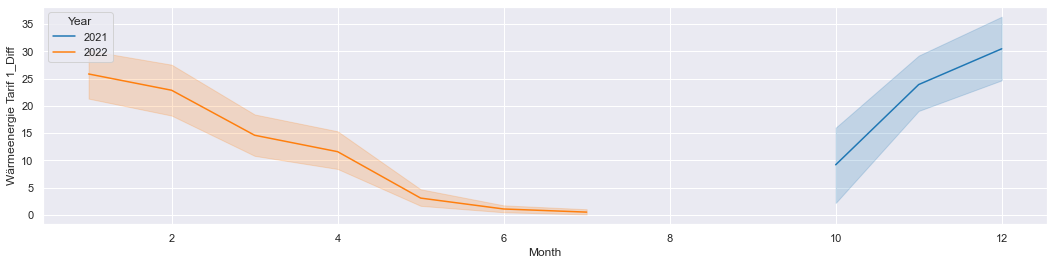

In [179]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="Wärmeenergie Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie Tarif 1.1_Diff'>

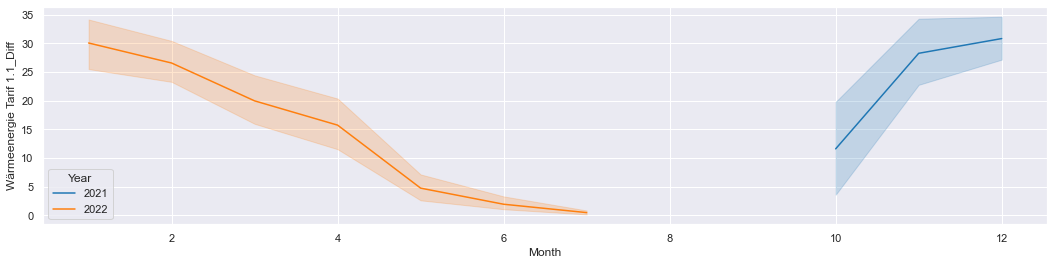

In [180]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="Wärmeenergie Tarif 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen_Diff'>

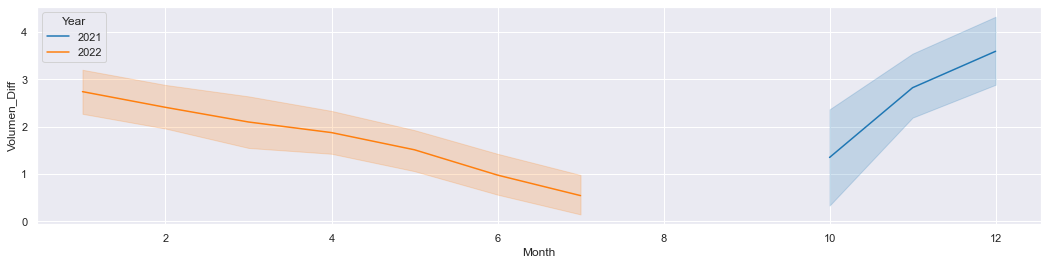

In [181]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="Volumen_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen.1_Diff'>

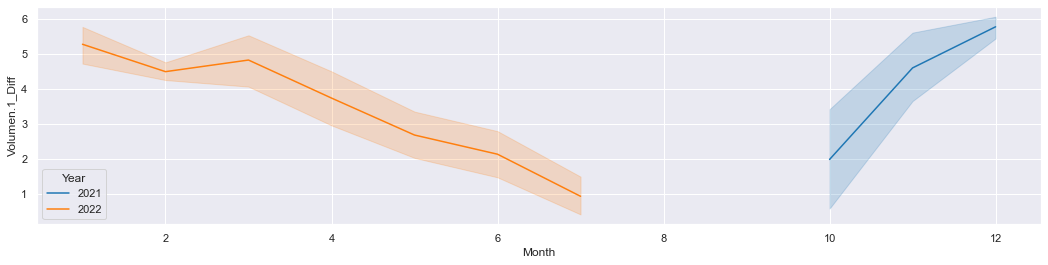

In [182]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="Volumen.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1_Diff'>

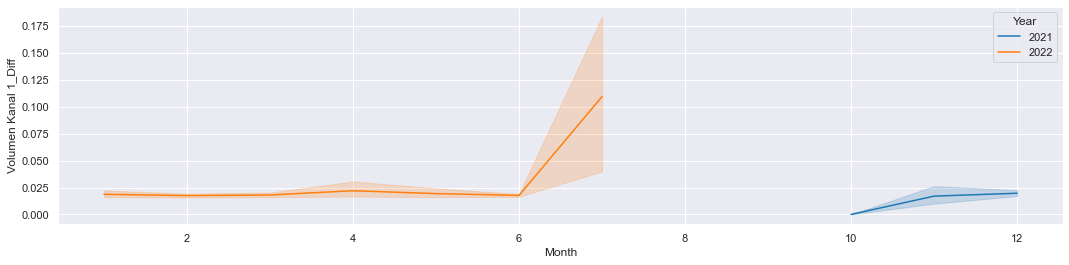

In [183]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="Volumen Kanal 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1.1_Diff'>

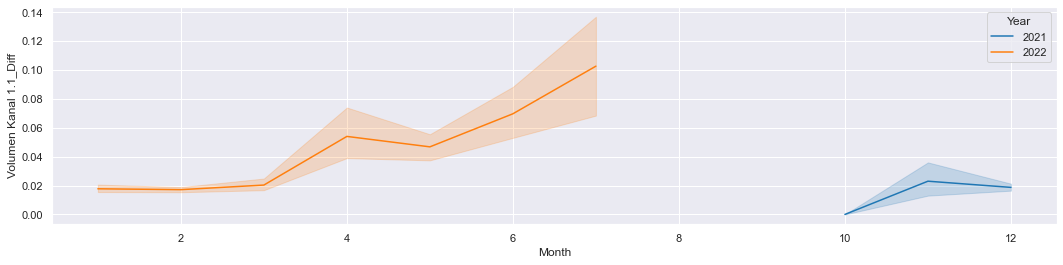

In [184]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="Volumen Kanal 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1_Diff'>

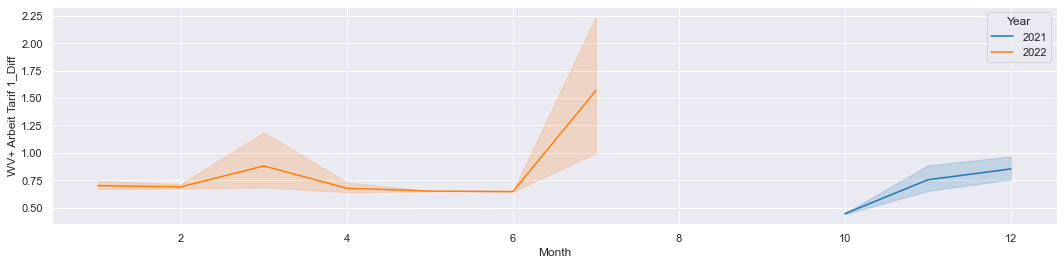

In [185]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="WV+ Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.1_Diff'>

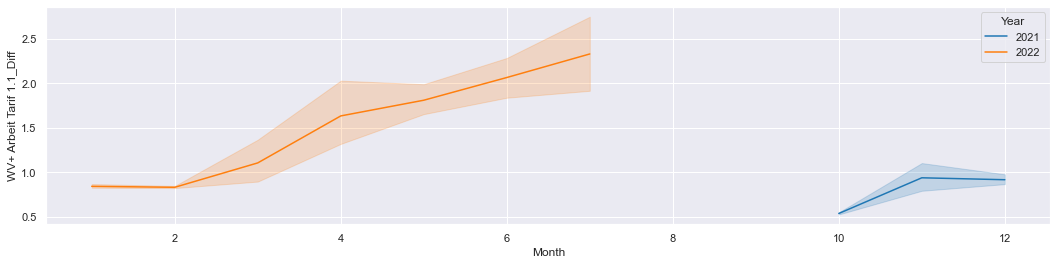

In [186]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="WV+ Arbeit Tarif 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.2_Diff'>

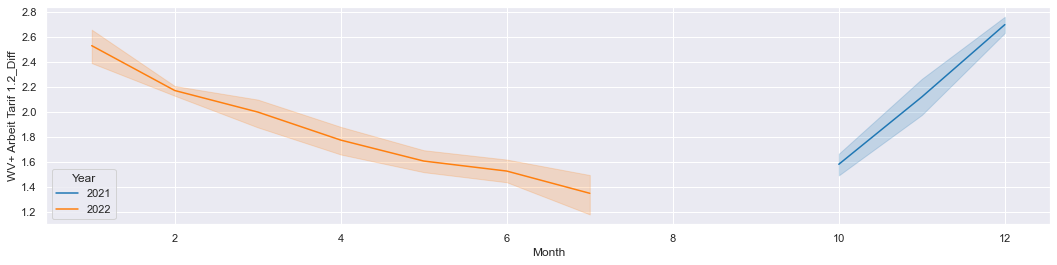

In [187]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="WV+ Arbeit Tarif 1.2_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV- Arbeit Tarif 1_Diff'>

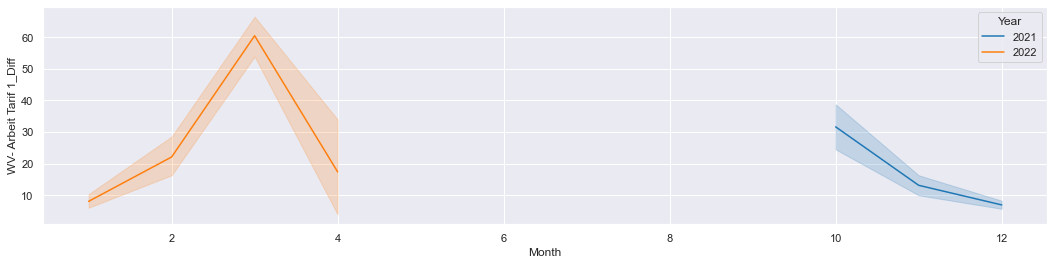

In [188]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="WV- Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV- Arbeit Tarif 1.1_Diff'>

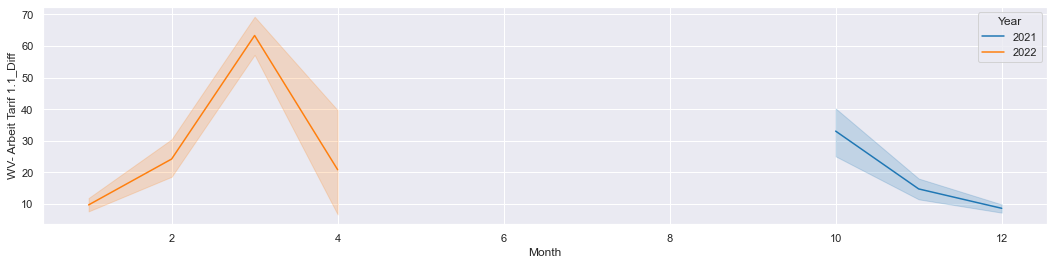

In [189]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_GTP, x="Month", y="WV- Arbeit Tarif 1.1_Diff",hue="Year",palette="tab10")

In [190]:
OH12.head(5)

,Date,Betriebsstunden,Fehlerstunden,Wärmeenergie total,Durchfluss,Volumen,Vorlauftemperatur,Rücklauftemperatur,Temperaturdifferenz,Wärmeleistung,...,Rücklauftemperatur.1,Temperaturdifferenz.1,Wärmeleistung.1,Volumen Kanal 1,Fehler Flags,WV+ Arbeit Tarif 1,P Summe,WV+ Arbeit tariflos,WV+ Arbeit Tarif 1.1,WV+ Arbeit Tarif 1.2
0,2020-10-28 12:45:00,53545.0,2.0,1528696.0,1.069292,39871.9,102.985809,66.361481,36.624329,44.767902,...,7.509537,4.446213,333.194563,NaN,0.0,10272.947,NaN,NaN,NaN,2860.5086
1,2020-10-28 13:00:00,53546.0,2.0,1528707.0,1.033069,39872.2,102.444458,66.269928,36.174530,42.719090,...,6.329529,6.093536,282.817781,NaN,0.0,10273.024,NaN,NaN,NaN,2860.5086
2,2020-10-28 13:15:00,53546.0,2.0,1528718.0,1.146111,39872.5,103.373566,67.112793,36.260773,47.493332,...,6.655243,8.254395,233.493703,NaN,0.0,10273.100,NaN,NaN,NaN,2860.5086
3,2020-10-28 13:30:00,53546.0,2.0,1528730.0,1.096552,39872.7,101.843140,67.449738,34.393402,43.084562,...,6.476044,10.339569,213.622187,NaN,0.0,10273.176,NaN,NaN,NaN,2860.5086
4,2020-10-28 13:45:00,53546.0,2.0,1528741.0,1.100023,39873.0,102.236908,66.736389,35.500519,44.629340,...,6.521408,10.688187,223.548125,NaN,0.0,10273.252,NaN,NaN,NaN,2860.5086


In [191]:
OH12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55126 entries, 0 to 55125
Data columns (total 26 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Date                   55126 non-null  datetime64[ns]
 1   Betriebsstunden        55111 non-null  float64       
 2   Fehlerstunden          55111 non-null  float64       
 3   Wärmeenergie total     55111 non-null  float64       
 4   Durchfluss             55111 non-null  float64       
 5   Volumen                55111 non-null  float64       
 6   Vorlauftemperatur      55111 non-null  float64       
 7   Rücklauftemperatur     55111 non-null  float64       
 8   Temperaturdifferenz    55111 non-null  float64       
 9   Wärmeleistung          55111 non-null  float64       
 10  Betriebsstunden.1      27412 non-null  float64       
 11  Fehlerstunden.1        27412 non-null  float64       
 12  Wärmeenergie total.1   55065 non-null  float64       
 13  D

In [192]:
df_OH12 = OH12.groupby(by=OH12['Date'].dt.date).agg({'Wärmeenergie total': 'max','Wärmeenergie total.1': 'max',
                                         'Durchfluss': 'sum', 'Volumen': 'max',
                                         'Durchfluss.1': 'sum','Volumen.1': 'max',
                                         'Vorlauftemperatur':'mean','Vorlauftemperatur.1':'mean',
                                         'Rücklauftemperatur.1':'mean','Rücklauftemperatur':'mean',
                                         'Temperaturdifferenz':'mean','Temperaturdifferenz.1':'mean',
                                         'Wärmeleistung':'sum','Wärmeleistung.1':'sum','Volumen Kanal 1':'max',
                                         'WV+ Arbeit Tarif 1':'max',
                                         'WV+ Arbeit Tarif 1.1':'max','WV+ Arbeit Tarif 1.2':'max',
                                         'WV+ Arbeit tariflos':'max', 'P Summe':'mean'})      
                                                 
                                                 
df_OH12 = df_OH12.reset_index(level=0)

In [193]:
df_OH12['Date'] = pd.to_datetime(df_OH12['Date'])
df_OH12['Year'] = df_OH12['Date'].dt.year
df_OH12['Month'] = df_OH12['Date'].dt.month

In [194]:
df_OH12['Wärmeenergie total_Diff'] = df_OH12['Wärmeenergie total'].diff()
df_OH12['Wärmeenergie total.1_Diff'] = df_OH12['Wärmeenergie total.1'].diff()
df_OH12['Volumen_Diff'] = df_OH12['Volumen'].diff()
df_OH12['Volumen.1_Diff'] = df_OH12['Volumen.1'].diff()
df_OH12['Volumen Kanal 1_Diff'] = df_OH12['Volumen Kanal 1'].diff()
df_OH12['WV+ Arbeit Tarif 1_Diff'] = df_OH12['WV+ Arbeit Tarif 1'].diff()
df_OH12['WV+ Arbeit Tarif 1.1_Diff'] = df_OH12['WV+ Arbeit Tarif 1.1'].diff()
df_OH12['WV+ Arbeit Tarif 1.2_Diff'] = df_OH12['WV+ Arbeit Tarif 1.2'].diff()
df_OH12['WV+ Arbeit tariflos_Diff'] = df_OH12['WV+ Arbeit tariflos'].diff()

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie total_Diff'>

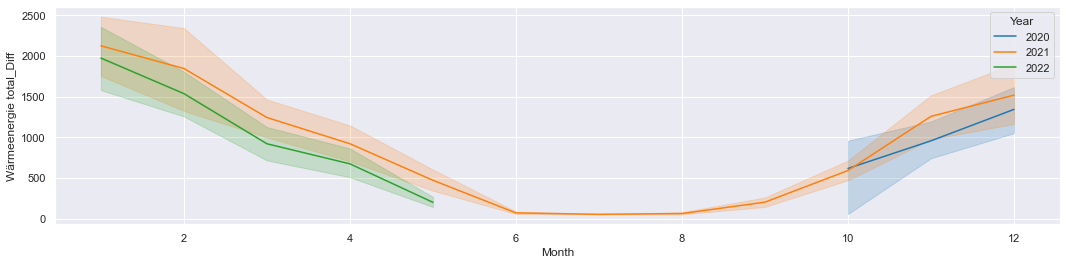

In [195]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="Wärmeenergie total_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Wärmeenergie total.1_Diff'>

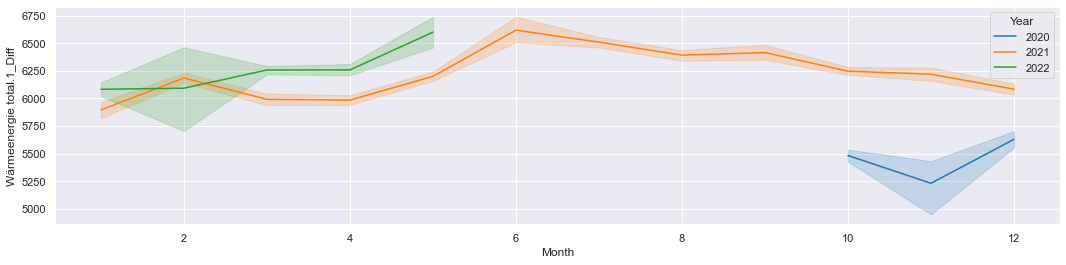

In [196]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="Wärmeenergie total.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen_Diff'>

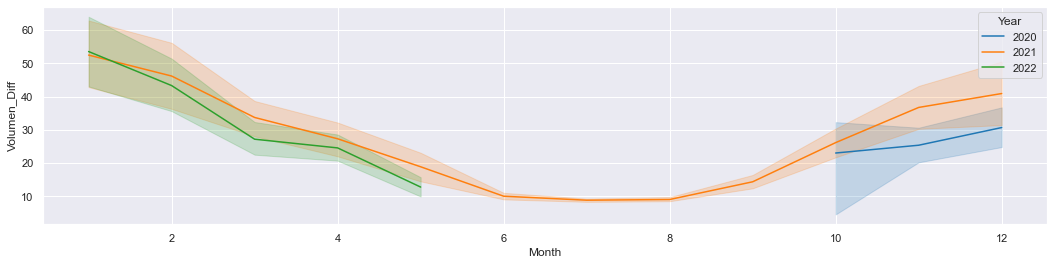

In [197]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="Volumen_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen.1_Diff'>

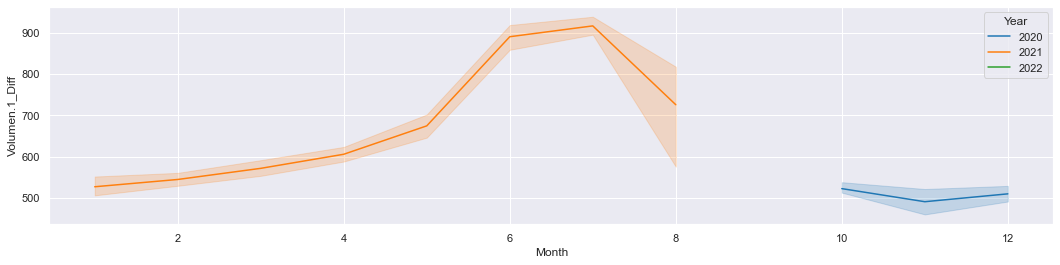

In [198]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="Volumen.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='Volumen Kanal 1_Diff'>

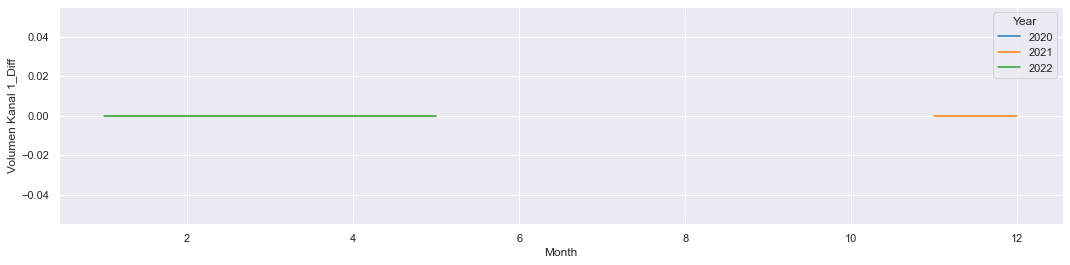

In [200]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="Volumen Kanal 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1_Diff'>

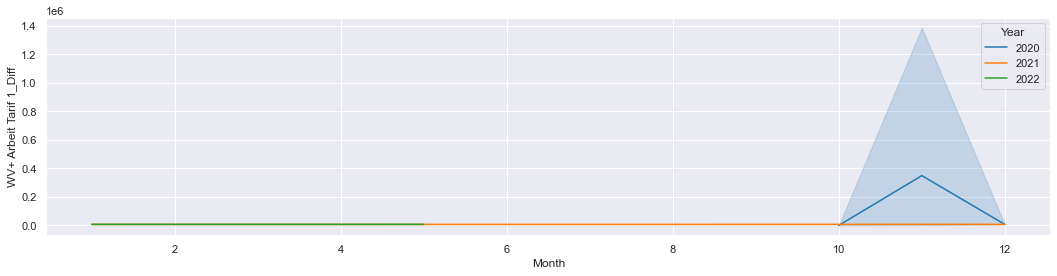

In [201]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="WV+ Arbeit Tarif 1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.1_Diff'>

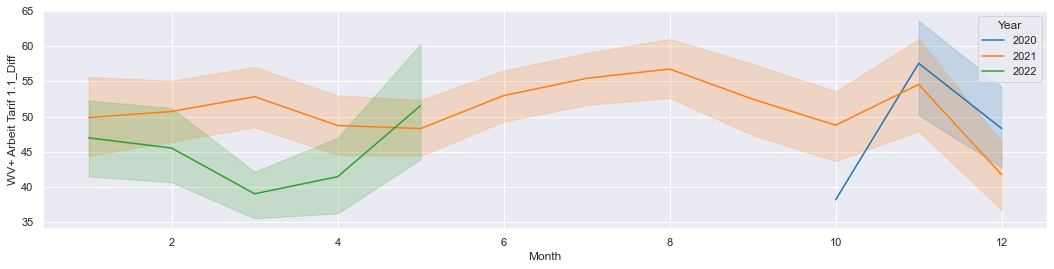

In [202]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="WV+ Arbeit Tarif 1.1_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit Tarif 1.2_Diff'>

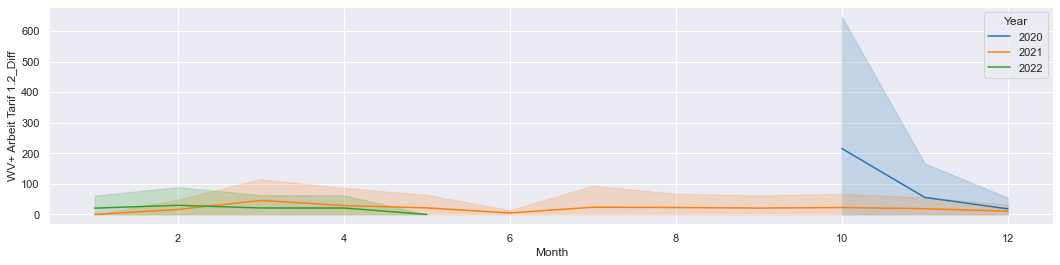

In [203]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="WV+ Arbeit Tarif 1.2_Diff",hue="Year",palette="tab10")

<AxesSubplot:xlabel='Month', ylabel='WV+ Arbeit tariflos_Diff'>

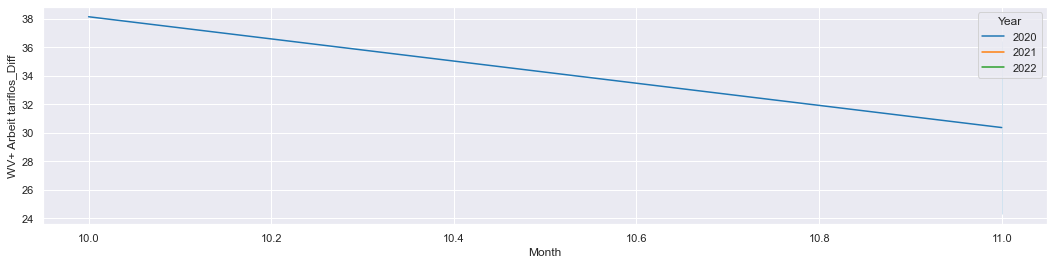

In [204]:
sns.set(rc={'figure.figsize':(18, 4)},)
sns.lineplot(data=df_OH12, x="Month", y="WV+ Arbeit tariflos_Diff",hue="Year",palette="tab10")